In [1]:
import numpy as np
import pandas as pd
P=np.array([[1,1],[6,1],[6,5]])


In [2]:
#Euclidean-distance function handle
def d2h(x,P):
 d=np.sqrt(np.sum((x-P)**2, axis=1))
 return d

In [3]:
x=np.array([3,1])
d2h(x,P)


array([2., 3., 5.])

In [4]:
# Minisum Distance Location
def TDh(x):
    return np.sum(d2h(x,P))
TDh(x)

10.0

In [5]:
x0 = np.mean(P,axis=0)
x0

array([4.33333333, 2.33333333])

In [6]:
from scipy.optimize import fmin
min=fmin(TDh,x0)

Optimization terminated successfully.
         Current function value: 8.697184
         Iterations: 30
         Function evaluations: 57


In [7]:
import matplotlib.pyplot as plt

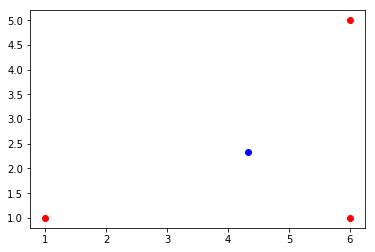

In [8]:
plt.plot(P[:,0],P[:,1],'ro')
plt.plot(x0[0],x0[1],'bo')
plt.show()

In [9]:
# 2-D Minisum Weighted-Distance Location
P=np.random.randint(40,size=(10,2))
w=np.random.randint(10,size=10)
P,w

(array([[17, 10],
        [38, 10],
        [25, 32],
        [ 0, 10],
        [18, 15],
        [39,  9],
        [25, 20],
        [39, 28],
        [23, 13],
        [10, 34]]), array([0, 0, 2, 7, 3, 8, 4, 3, 1, 0]))

In [10]:
def TCh(x):
    return sum(np.multiply(w,d2h(x,P)))

In [11]:
fmin(TCh,x0)

Optimization terminated successfully.
         Current function value: 432.281143
         Iterations: 57
         Function evaluations: 112


array([24.61999024, 17.16384179])

In [12]:
# 1-D Location with Procurement and Distribution Costs
fout = [10,20,30]
rout=1
wout=np.dot(fout,rout)
wout

array([10, 20, 30])

In [13]:
BOM= [2,.5]
fin=np.dot(BOM,sum(fout))
fin

array([120.,  30.])

In [14]:
rin=.33
win=np.dot(fin,rin)
win

array([39.6,  9.9])

In [15]:
P=np.array([50,270,150,190,420]).reshape(5,1)
P

array([[ 50],
       [270],
       [150],
       [190],
       [420]])

In [16]:
w=np.concatenate((win,wout),axis=None)
def TCh(x):
    return sum(np.multiply(w,d2h(x,P)))
fmin(TCh,np.mean(P,axis=0))


Optimization terminated successfully.
         Current function value: 13636.000039
         Iterations: 26
         Function evaluations: 52


array([189.99999619])

In [17]:
# Weight gaining or weight losing
sum(win),sum(wout)

(49.5, 60)

In [18]:
sum(fin),sum(fout)

(150.0, 60)

In [19]:
# 2-D Maximin
P=[[1,1],[7,1],[4,5]]
def TCh(x):
    return -np.min(d2h(x,P))
fmin(TCh,np.mean(P,axis=0))   


Optimization terminated successfully.
         Current function value: -3.124984
         Iterations: 36
         Function evaluations: 70


array([4.00000788, 1.87501556])

In [20]:
X,Y=np.meshgrid(np.arange(-4,12,.2),np.arange(-4,10,.2),sparse=False)
Z=np.zeros(np.shape(X))

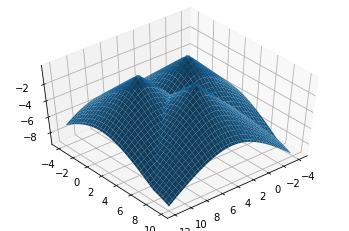

In [24]:
for i in range(0,np.shape(X)[0]):
        for j in range(0,np.shape(X)[1]):
            Z[i][j]=TCh(np.array([X[i][j],Y[i][j]]))
            
from mpl_toolkits.mplot3d import Axes3D  
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(elev=50., azim=50)
plt.show()

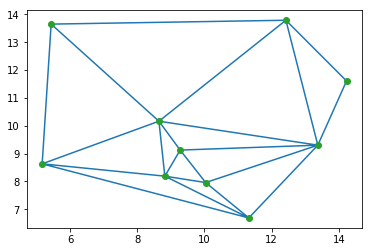

In [30]:
from scipy.spatial import Delaunay
points=np.random.rand(10,2)*10+5
tri = Delaunay(points)
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

array([[14.42882604, 14.83498244],
       [13.42796591, 11.91898822],
       [12.48635505, 14.77597871],
       [ 9.73193827, 11.51921612],
       [13.25230786, 11.36679801],
       [14.70807037,  7.08648132],
       [ 7.93228022, 12.29741047],
       [11.94724843,  7.31663659],
       [ 7.75134812, 13.06770624],
       [ 8.3359766 ,  9.66524435]])